In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, callbacks, preprocessing
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split 
from keras.layers import Input, Dense, LSTM, Conv1D, Flatten
from keras.models import Model
import keras




print("VERSIES:")
print(f"{'- Pandas':<12} = {pd.__version__}")
print(f"{'- Numpy':<12} = {np.__version__}")
print(f"{'- Matplotlib':<12} = {plt.matplotlib.__version__}")
print(f"{'- Tensorflow':<12} = {tf.__version__}")
print(f"{'- Keras':<12} = {keras.__version__}")

VERSIES:
- Pandas     = 2.2.3
- Numpy      = 1.26.4
- Matplotlib = 3.10.1
- Tensorflow = 2.15.0
- Keras      = 2.15.0


# CV Inlezen

       Tijd (s)  Setpoint (m)  Hoogte (m)      Fout  Fout_Integratie  \
0          0.00      0.184165    0.004019  0.184165         0.001842   
1          0.00      0.891046    0.012057  0.887027         0.010712   
2          0.01      0.891046    0.024114  0.878989         0.019502   
3          0.02      0.891046    0.040190  0.866932         0.028171   
4          0.03      0.891046    0.060285  0.850856         0.036680   
...         ...           ...         ...       ...              ...   
10470    104.69      0.074084    0.060592  0.013565         0.122973   
10471    104.70      0.074084    0.060666  0.013491         0.123108   
10472    104.71      0.074084    0.060740  0.013417         0.123242   
10473    104.72      0.074084    0.060813  0.013344         0.123375   
10474    104.73      0.074084    0.060885  0.013271         0.123508   

       Fout_Afgeleide       PWM  
0           18.416521  1.000000  
1           70.286215  1.000000  
2           -0.803800  1.000000  

ValueError: x and y must have same first dimension, but have shapes (500,) and (475,)

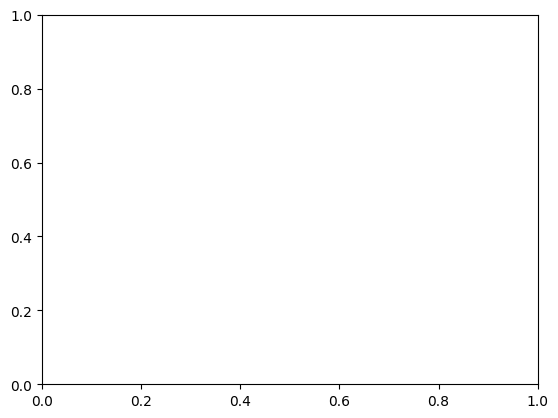

In [84]:

CSV_PATH = '/Users/mitchelreints/Desktop/05_Development/#Projecten/PEE51 - AIRegelsysteem/simulatie_resultaten.csv'
CSV_DATA = pd.read_csv(CSV_PATH)
print(CSV_DATA)


start = 10000
end = 10500

plt.figure()
plt.plot(range(start, end), CSV_DATA["Hoogte (m)"][start:end], label="Hoogte")
plt.plot(range(start, end), CSV_DATA["Setpoint (m)"][start:end], label="Doelhoogte")
plt.plot(range(start, end), CSV_DATA["PWM"][start:end], label="PWM")
plt.title(f"Samples {start} tot {end}")
plt.xlabel("Tijd (s)")
plt.ylabel("Hoogte (m)")
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(range(start, end), CSV_DATA["Fout"][start:end], label="Fout")
plt.title(f"Samples {start} tot {end}")
plt.xlabel("Tijd (s)")
plt.ylabel("Hoogte (m)")
plt.grid(True)
plt.legend()

plt.figure()

plt.plot(range(start, end), CSV_DATA["Fout_Integratie"][start:end], label="Fout_Integratie")

plt.title(f"Samples {start} tot {end}")
plt.xlabel("Tijd (s)")
plt.ylabel("Hoogte (m)")
plt.grid(True)
plt.legend()

plt.figure()

plt.plot(range(start, end), CSV_DATA["Fout_Afgeleide"][start:end], label="Fout_Afegeleide")
plt.title(f"Samples {start} tot {end}")
plt.xlabel("Tijd (s)")
plt.ylabel("Hoogte (m)")
plt.grid(True)
plt.legend()





plt.show()

In [ ]:
test_size = 0.2

data_input = CSV_DATA[["Setpoint (m)", "Hoogte (m)", "PWM", "Fout", "Fout_Integratie", "Fout_Afgeleide"]]
print(f"\nAF_data_input: {data_input.shape}")
print(f"\nAF_data_input:\n {data_input}")

data_input = data_input.to_numpy()
print(f"\nAF_data_input: {data_input.shape}")
print(f"\nAF_data_input:\n {data_input}")
    



AF_data_input: (10475, 6)

AF_data_input:
        Setpoint (m)  Hoogte (m)       PWM      Fout  Fout_Integratie  \
0          0.184165    0.004019  1.000000  0.184165         0.001842   
1          0.891046    0.012057  1.000000  0.887027         0.010712   
2          0.891046    0.024114  1.000000  0.878989         0.019502   
3          0.891046    0.040190  1.000000  0.866932         0.028171   
4          0.891046    0.060285  1.000000  0.850856         0.036680   
...             ...         ...       ...       ...              ...   
10470      0.074084    0.060592  0.442853  0.013565         0.122973   
10471      0.074084    0.060666  0.442853  0.013491         0.123108   
10472      0.074084    0.060740  0.442854  0.013417         0.123242   
10473      0.074084    0.060813  0.442854  0.013344         0.123375   
10474      0.074084    0.060885  0.442855  0.013271         0.123508   

       Fout_Afgeleide  
0           18.416521  
1           70.286215  
2           -0.8038

# Normalizeren van de data

In [85]:
data_input = tf.keras.utils.normalize(data_input, axis=1)
print(f"\nAF_data_input: {data_input.shape}")
print(f"\nAF_data_input:\n {data_input}")


AF_data_input: (10475, 6)

AF_data_input:
 [[ 0.00998428  0.00021789  0.05421379  0.00998428  0.00009986  0.99842948]
 [ 0.01267408  0.0001715   0.01422383  0.01261692  0.00015237  0.99973887]
 [ 0.49705157  0.0134515   0.55782931  0.49032583  0.01087879 -0.4483832 ]
 ...
 [ 0.15768963  0.12928659  0.94262569  0.02855842  0.26232364 -0.0157    ]
 [ 0.15767565  0.1294305   0.94254214  0.02840052  0.26258346 -0.01561347]
 [ 0.15766138  0.12957202  0.94245899  0.02824259  0.26284275 -0.01552693]]


In [86]:
data_output = (CSV_DATA["PWM"] * 100).astype(int)
print(f"\nBE_data_output:\n {data_output}")

data_output = data_output.to_numpy()
print(f"\nAF_data_output: {data_output.shape}")
print(f"\nAF_data_output:\n {data_output}")


BE_data_output:
 0        100
1        100
2        100
3        100
4        100
        ... 
10470     44
10471     44
10472     44
10473     44
10474     44
Name: PWM, Length: 10475, dtype: int64

AF_data_output: (10475,)

AF_data_output:
 [100 100 100 ...  44  44  44]


In [87]:


_, data_input_test, _, data_output_test = train_test_split(data_input, data_output, test_size=test_size, random_state=42)

print(f"\ndata_input_test: {data_input_test.shape}")
print(f"\ndata_input_test:\n{data_input_test}")
print(f"\nlengte_data_input_test: {len(data_input_test)}")

print(f"\ndata_output_test: {data_output_test.shape}")
print(f"\ndata_output_test:\n{data_output_test}")
print(f"\nlengte_data_output_test: {len(data_output_test)}")


data_input_test: (2095, 6)

data_input_test:
[[ 0.58205732  0.53996203  0.59385978  0.04232734  0.12103855 -0.02321458]
 [ 0.1619061   0.06556318  0.96738478  0.0968696   0.14644193 -0.05315644]
 [ 0.65359015  0.65947721  0.34870672 -0.00590203  0.12757984  0.0013794 ]
 ...
 [ 0.64024696  0.64007955  0.40301059  0.00016832  0.13403146 -0.0000928 ]
 [ 0.61869071  0.61953417  0.4578572  -0.0008476   0.15415921  0.00046618]
 [ 0.64022415  0.64009678  0.40299714  0.00012828  0.13409856 -0.00007097]]

lengte_data_input_test: 2095

data_output_test: (2095,)

data_output_test:
[44 44 44 ... 44 44 44]

lengte_data_output_test: 2095


# Model aanmaken

In [94]:
input_layer_size = 6
hidden_layer_size = 48
hidden_layer_size_2 = 48
output_layer_size = 101


model = keras.Sequential(name="Feedfoward_Model")
model.add(layers.Input(shape=(input_layer_size,), name="Input_Layer"))
model.add(layers.Dense(hidden_layer_size, activation='relu', name="Hidden_Layer"))
model.add(layers.Dense(hidden_layer_size_2, activation='relu', name="Hidden_Layer_2"))
model.add(layers.Dense(output_layer_size, activation='sigmoid', name="Output_Layer"))

model.summary()

Model: "Feedfoward_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 48)                336       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 48)                2352      
                                                                 
 Output_Layer (Dense)        (None, 101)               4949      
                                                                 
Total params: 7637 (29.83 KB)
Trainable params: 7637 (29.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Compilen

In [95]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Trainen

In [96]:
epochs = 25
batch_size = 101
history = model.fit(data_input, data_output, epochs=epochs, batch_size=batch_size, validation_data=(data_input_test, data_output_test))

Epoch 1/25
104/104 [==============================] - 0s 1ms/step - loss: 2.1561 - accuracy: 0.8777 - val_loss: 0.4970 - val_accuracy: 0.9203
Epoch 2/25
104/104 [==============================] - 0s 622us/step - loss: 0.4754 - accuracy: 0.9203 - val_loss: 0.4136 - val_accuracy: 0.9303
Epoch 3/25
104/104 [==============================] - 0s 692us/step - loss: 0.4093 - accuracy: 0.9289 - val_loss: 0.3632 - val_accuracy: 0.9327
Epoch 4/25
104/104 [==============================] - 0s 690us/step - loss: 0.3681 - accuracy: 0.9298 - val_loss: 0.3286 - val_accuracy: 0.9332
Epoch 5/25
104/104 [==============================] - 0s 689us/step - loss: 0.3381 - accuracy: 0.9305 - val_loss: 0.3053 - val_accuracy: 0.9341
Epoch 6/25
104/104 [==============================] - 0s 667us/step - loss: 0.3134 - accuracy: 0.9308 - val_loss: 0.2832 - val_accuracy: 0.9341
Epoch 7/25
104/104 [==============================] - 0s 672us/step - loss: 0.2934 - accuracy: 0.9318 - val_loss: 0.2642 - val_accuracy: 0

# Training en validation loss Plotten

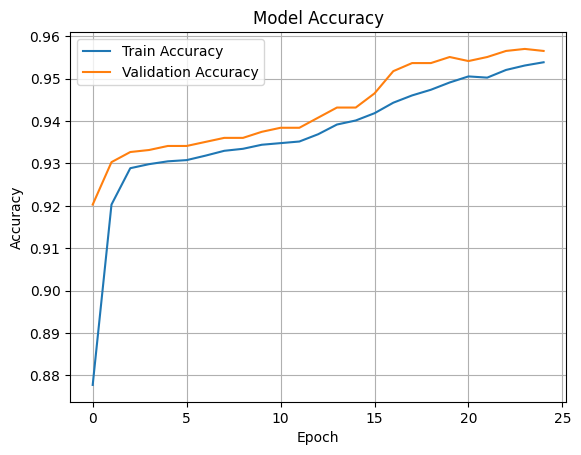

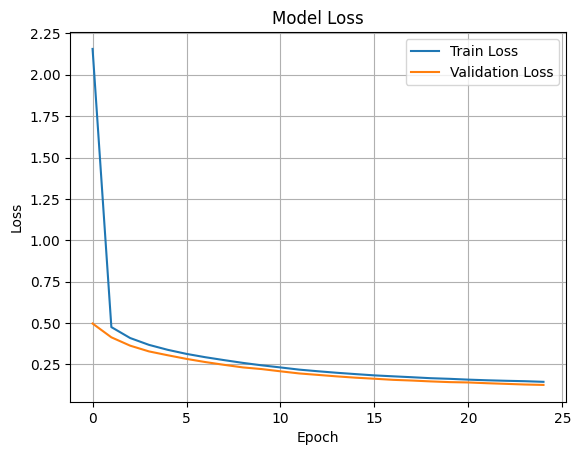

In [97]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# PREDICT


66/66 [==============================] - 0s 325us/step - loss: 0.1260 - accuracy: 0.9566

accuracy : 95.66 %


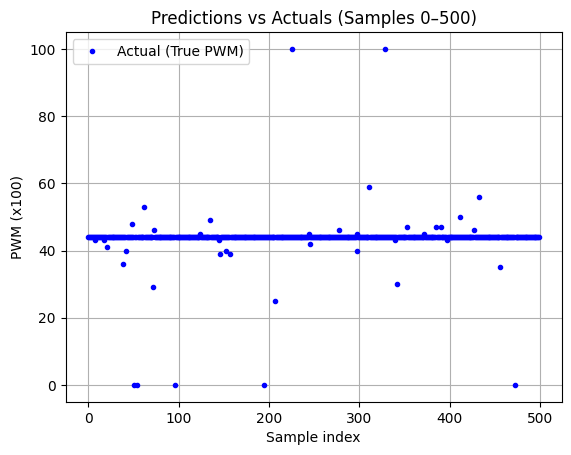

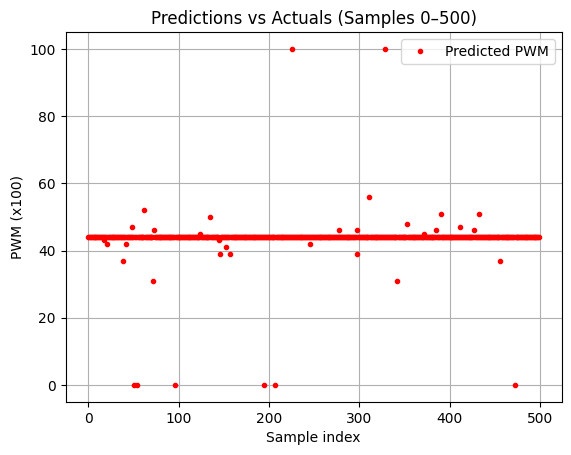

In [99]:
import numpy as np
import matplotlib.pyplot as plt



# Maak voorspellingen
predictions = model.predict(data_input_test)
predicted_labels = np.argmax(predictions, axis=1)

scores = model.evaluate(data_input_test, data_output_test)
print(f"\n{model.metrics_names[1]} : {round(scores[1]*100, 2)} %")

# Stel de range in
start = 0
end = 500

# Plot alleen het gewenste bereik
plt.figure()
plt.title(f"Predictions vs Actuals (Samples {start}–{end})")
plt.plot(range(start, end), data_output_test[start:end], 'b.', label='Actual (True PWM)')
plt.xlabel("Sample index")
plt.ylabel("PWM (x100)")
plt.legend()
plt.grid(True)

plt.figure()
plt.title(f"Predictions vs Actuals (Samples {start}–{end})")
plt.plot(range(start, end), predicted_labels[start:end], 'r.', label='Predicted PWM')
plt.xlabel("Sample index")
plt.ylabel("PWM (x100)")
plt.legend()
plt.grid(True)




plt.show()